### KNN
- Simple nonparametric supervised ML algorithm.
- Nonparametric means - DOESN'T make any assumptions on the distribution of the data.
- Vote of the nearst neighboors
- **Classification** and **Regression**

#### Types of Nearest Neighbors Classifiers
- KNearestNeighbors - Most common
- RadiusNeighborsClassifier - Classification is based os the nº of neighbors within a fixed radius of each training point. Not Uniformly sampled.
#### In Regression
- Values are assigned based on the **mean** of the nearest neighbors

### Caracteristics
- Prone to the **curse of dimensionality** (to many features) that leads to overfitting
- Feature Selection can **reduce the number of features**
- **Lazy learner** - all the heavy lifting happens at the **prediction stage**
- Data needs to be **scaled** since the **Euclidean distance** used in computing the distances is sensitive to magnitudes

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('default.csv')

In [3]:
df.shape

(10000, 4)

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
# Are there null values?
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [6]:
# Are there duplicated values?
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [8]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [9]:
df.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [10]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [11]:
### Visualizing the default classes
defaulters = df.groupby('default')['student'].count().reset_index()

In [12]:
defaulters

,default,student
0,No,9667
1,Yes,333


### Visualization of the number of defaulters

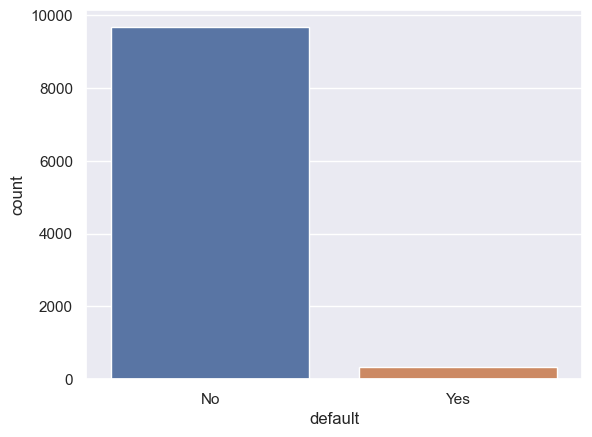

In [13]:
sns.countplot(x=df.default);

### Visualization of the number of students

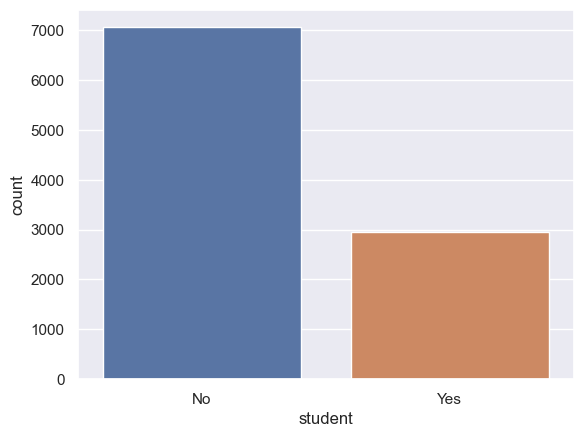

In [14]:
sns.countplot(x=df.student);

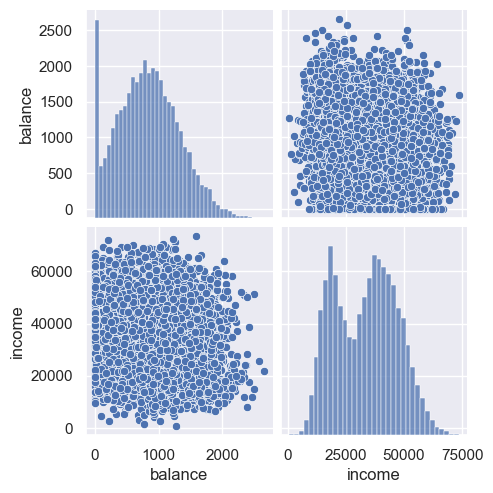

In [15]:
sns.pairplot(df)

### Distribution of the data & Checking for Outliers

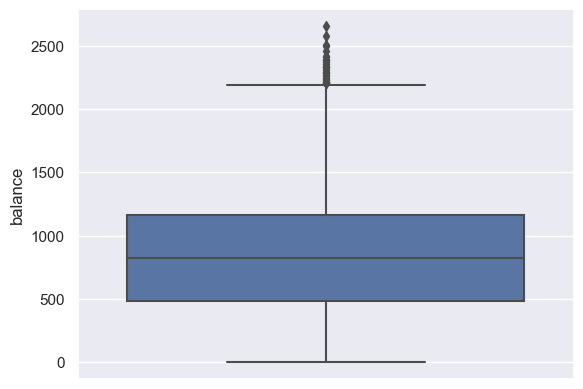

In [16]:
sns.boxplot(y=df.balance);

In [17]:
q1_income, q3_income = np.percentile(df.income, [25,75])

In [18]:
q1_balance, q3_balance = np.percentile(df.balance, [25,75])

In [19]:
q1_income, q3_income

(21340.462905, 43807.729275)

In [20]:
q1_balance, q3_balance

(481.73110505, 1166.30838675)

In [21]:
q4_balance = np.percentile(df.balance, [99])

In [22]:
q4_balance

array([2008.47086748])

In [23]:
q2_balance = np.percentile(df.balance, [50])
q2_balance

array([823.6369726])

In [24]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


### Outliers - calculate the interquarter range
- iqr_balance = q3_balance - q1_balance
- lower_bound_balance = q1_balance - (1.5 * iqr_balance)
- upper_bound_balance = q3_balance + (1.5 * iqr_balance)

In [25]:
iqr_income = q3_income - q1_income

In [26]:
iqr_income.round(2)

22467.27

In [27]:
q1_balance, q3_balance

(481.73110505, 1166.30838675)

In [28]:
iqr_balance = q3_balance - q1_balance

In [29]:
iqr_balance

684.5772817

In [30]:
lower_bound_income = q1_income - (1.5 * iqr_income)
upper_bound_income = q3_income + (1.5 * iqr_income)

In [31]:
lower_bound_income, upper_bound_income

(-12360.436649999996, 77508.62883)

In [32]:
lower_bound_balance = q1_balance - (1.5 * iqr_balance)
upper_bound_balance = q3_balance + (1.5 * iqr_balance)


In [33]:
lower_bound_balance, upper_bound_balance

(-545.1348175, 2193.1743093)

### See the Outliers - balance

In [37]:
df[df['balance'] > upper_bound_balance].head()

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.49225
1136,Yes,No,2499.016750,51504.29396
1160,Yes,Yes,2502.684931,14947.51975
1359,Yes,No,2220.966201,40725.09621
1502,Yes,Yes,2332.878254,11770.23412


In [38]:
df[df['balance'] > upper_bound_balance].count()

default    31
student    31
balance    31
income     31
dtype: int64

In [39]:
df[df['balance'] > upper_bound_balance].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 173 to 9978
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  31 non-null     object 
 1   student  31 non-null     object 
 2   balance  31 non-null     float64
 3   income   31 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


### See the Outliers - income

In [40]:
df[df['income'] > upper_bound_income]

,default,student,balance,income


#### No outliers in bound income

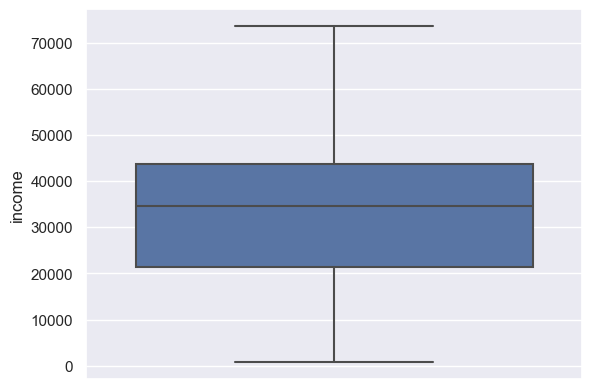

In [42]:
sns.boxplot(y=df.income);

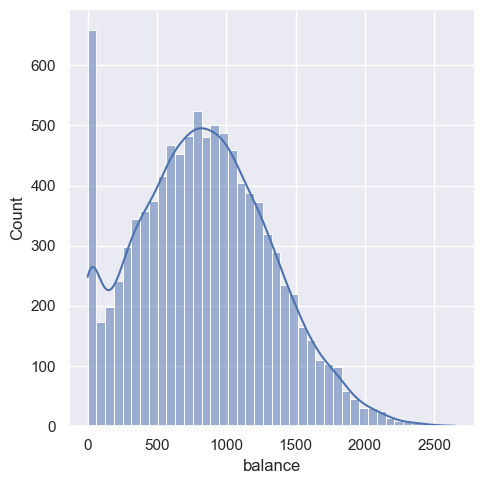

In [44]:
sns.displot(x=df.balance, kde=True);

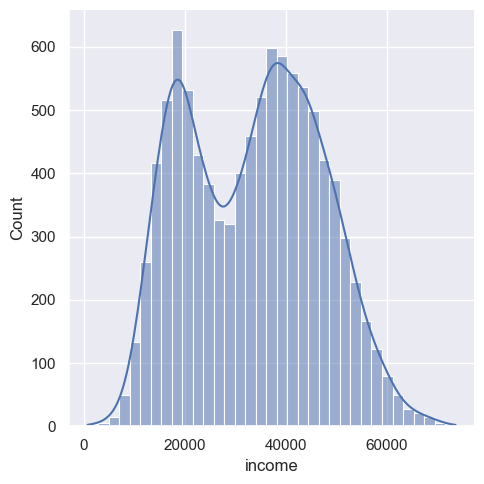

In [46]:
sns.displot(df.income, kde=True);

### What's the balance for the two classes?

In [47]:
# In order to see the full figure
# full numbers e.g: 5099855.481650
pd.set_option('float_format', '{:f}'.format)
# Group by student and sum the balance and reset index
default = df.groupby(['default', 'student'])['balance'].sum().reset_index()
# Define the columns for the new DataFrame
default.columns = ['Default','Student','Balance']
# Sort by values and arrange from the largest
default = default.sort_values(by='Balance', ascending=False)
default

,Default,Student,Balance
0,No,No,5099855.481650
1,No,Yes,2671868.751861
2,Yes,No,345756.477949
3,Yes,Yes,236268.144690


In [48]:
df.groupby('default')['balance'].sum().reset_index()

,default,balance
0,No,7771724.233510
1,Yes,582024.622639


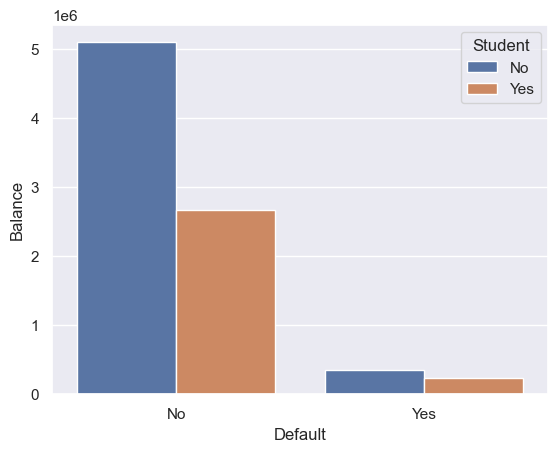

In [55]:
sns.barplot(data=default, x='Default', y='Balance', hue='Student');

### What's the income for the two classes?

In [57]:
# In order to see the full figure
# full numbers e.g: 5099855.481650
pd.set_option('float_format', '{:f}'.format)
# Group by student and sum the balance and reset index
default_income = df.groupby(['default', 'student'])['income'].sum().reset_index()
# Define the columns for the new DataFrame
default_income.columns = ['Default','Student','Income']
# Sort by values and arrange from the largest
default_income = default_income.sort_values(by='Income', ascending=False)
default_income

,Default,Student,Income
0,No,No,273955578.919497
1,No,Yes,50528553.847708
2,Yes,No,8368760.438320
3,Yes,Yes,2316925.554049


In [58]:
df.groupby('default')['income'].sum().reset_index()

,default,income
0,No,324484132.767205
1,Yes,10685685.992369


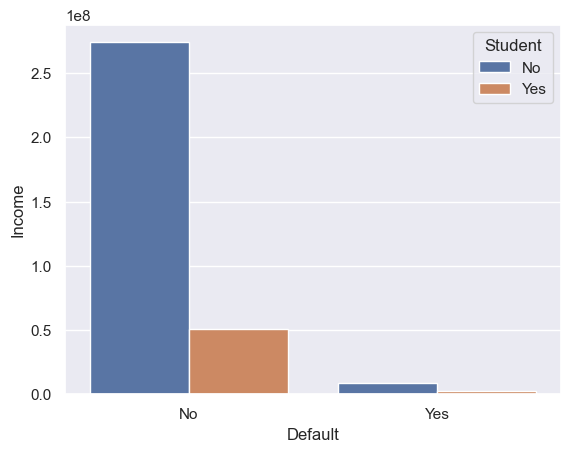

In [59]:
sns.barplot(data=default_income, x='Default', y='Income', hue='Student');